In [1]:
import cv2

import matplotlib.pyplot as plt

import numpy as np

import os

import math

from PIL import Image

from skimage.feature import match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform
from skimage.transform import AffineTransform


## Don't forget to run feature extraction before running this script
```python extract_features.py --image_list_file image_list_qualitative.txt```

### Change the pair index here (possible values: 1, 2 or 3)

In [2]:
pair_idx = 5
# 4 +ou-
# 6 mauvais
# 7 bien
# 12 mauvais
assert(pair_idx in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,17,18,19,20])

### Loading the features

In [3]:
pair_path = os.path.join('images_rot', 'pair_%d' % pair_idx)

In [4]:
image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

In [5]:
feat1 = np.load(os.path.join(pair_path, '1.jpg.d2-net'))
feat2 = np.load(os.path.join(pair_path, '2.jpg.d2-net'))

### Mutual nearest neighbors matching

In [6]:
matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)

In [7]:
print('Number of raw matches: %d.' % matches.shape[0])

Number of raw matches: 126.


### Homography fitting

In [8]:
keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model1, inliers = ransac(
    (keypoints_left, keypoints_right),
    AffineTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

Number of inliers: 80.


### Plotting

In [9]:
inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image3 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)

In [10]:
pair_idx = pair_idx+1
print(pair_idx)

pair_path = os.path.join('images_rot', 'pair_%d' % pair_idx)

image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

feat1 = np.load(os.path.join(pair_path, '1.jpg.d2-net'))
feat2 = np.load(os.path.join(pair_path, '2.jpg.d2-net'))

matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)
print('Number of raw matches: %d.' % matches.shape[0])

keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model2, inliers = ransac(
    (keypoints_left, keypoints_right),
    AffineTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image4 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)


6
Number of raw matches: 99.
Number of inliers: 7.


In [11]:
pair_idx = pair_idx+1
print(pair_idx)

pair_path = os.path.join('images_rot', 'pair_%d' % pair_idx)

image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

feat1 = np.load(os.path.join(pair_path, '1.jpg.d2-net'))
feat2 = np.load(os.path.join(pair_path, '2.jpg.d2-net'))

matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)
print('Number of raw matches: %d.' % matches.shape[0])

keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model3, inliers = ransac(
    (keypoints_left, keypoints_right),
    AffineTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image5 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)

7
Number of raw matches: 100.
Number of inliers: 6.


In [12]:
pair_idx = pair_idx+1

pair_path = os.path.join('images_rot', 'pair_%d' % pair_idx)

image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))

feat1 = np.load(os.path.join(pair_path, '1.jpg.d2-net'))
feat2 = np.load(os.path.join(pair_path, '2.jpg.d2-net'))

matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)
print('Number of raw matches: %d.' % matches.shape[0])

keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
np.random.seed(0)
model4, inliers = ransac(
    (keypoints_left, keypoints_right),
    AffineTransform, min_samples=4,
    residual_threshold=4, max_trials=10000
)
n_inliers = np.sum(inliers)
print('Number of inliers: %d.' % n_inliers)

inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
image6 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)

Number of raw matches: 108.
Number of inliers: 6.


In [13]:
print(model1.params)
T_x = model1.params[0,2]*model1.params[0,0]+model1.params[1,2]*model1.params[1,0]
T_y = model1.params[1,2]*model1.params[0,0]-model1.params[0,2]*model1.params[1,0]
print('Transltation : (',model1.params[0,2],',', model1.params[1,2],')')
print('Transltation2 : (',T_x,',', T_y,')')
print('Rotation : ', -np.angle(model1.params[0,0]+model1.params[1,0]*1j)*180/np.pi)
print(model2.params)
print('Transltation : (',model2.params[0,2],',', model2.params[1,2],')')
print('Rotation : ', -np.angle(model2.params[0,0]+model2.params[1,0]*1j)*180/np.pi-270)
print(model3.params)
print('Transltation : (',model3.params[0,2],',', model3.params[1,2],')')
print('Rotation : ', -np.angle(model3.params[0,0]+model3.params[1,0]*1j)*180/np.pi-180)
print(model4.params)
print('Transltation : (',model4.params[0,2],',', model4.params[1,2],')')
print('Rotation : ', -np.angle(model4.params[0,0]+model4.params[1,0]*1j)*180/np.pi-90)

[[  1.00497665  -0.07728919  11.96351872]
 [  0.06899452   0.99758824 -11.65427319]
 [  0.           0.           1.        ]]
Transltation : ( 11.963518717768181 , -11.654273185659974 )
Transltation2 : ( 11.218976014481264 , -12.537689635178701 )
Rotation :  -3.9273564978086575
[[  0.58731321  -0.07775509  21.56033991]
 [  0.20400978   0.81962861 -29.39278178]
 [  0.           0.           1.        ]]
Transltation : ( 21.560339908637374 , -29.39278177950945 )
Rotation :  -289.15523949009275
[[ 1.22596193e-01 -1.82942171e+00  5.78333813e+02]
 [-1.50050901e-01  4.53584974e-01 -3.99670218e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transltation : ( 578.3338128164561 , -3.996702179923183 )
Rotation :  -129.24987737781282
[[ 9.99718646e-01  9.08404426e-01 -1.80130343e+02]
 [-7.64908791e-01 -4.13204224e-02  2.87929681e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transltation : ( -180.1303427804628 , 287.92968130415306 )
Rotation :  -52.57952758340704


In [18]:
print(model1.translation)
print(model1.rotation*180/np.pi)

[ 11.96351872 -11.65427319]
3.9273564978086575


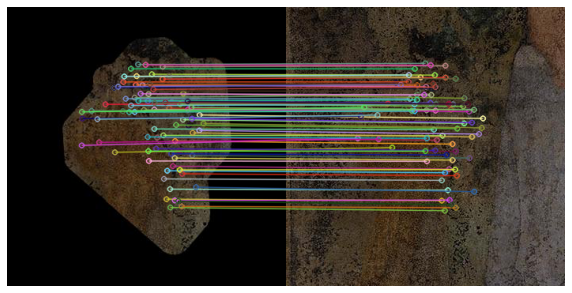

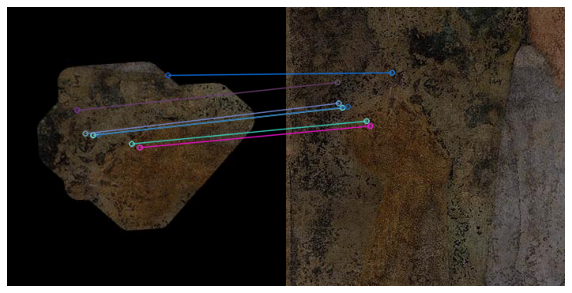

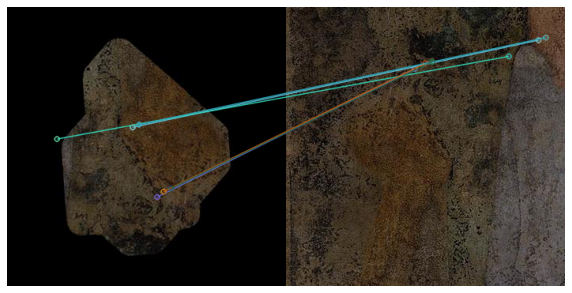

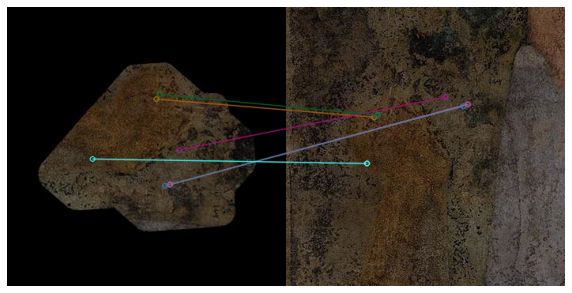

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(image3)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(image4)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(image5)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(image6)
plt.axis('off')
plt.show()